In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# Set constants
IMAGE_SIZE = 256  # Size to which each image will be resized
BATCH_SIZE = 32   # Number of images to process in a batch
CHANNELS = 3      # Number of color channels in the images (RGB)
EPOCHS = 30       # Number of epochs to train the model


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato-leaf",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5452 files belonging to 4 classes.


In [4]:
# Get class names
class_names = dataset.class_names
print(class_names)


['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']


In [5]:
len(dataset)

171

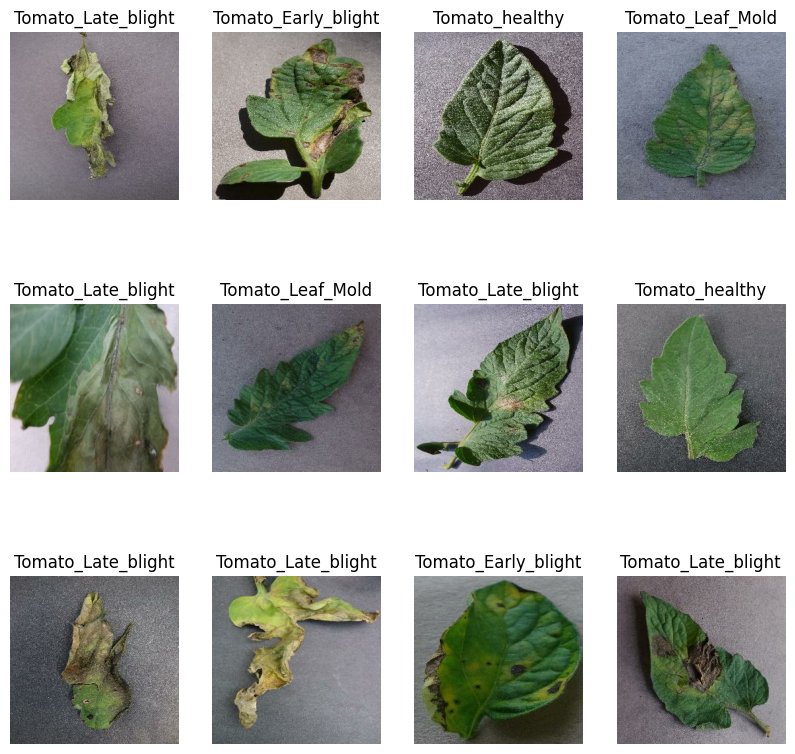

In [6]:
# Verify the dataset
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

171

In [8]:
train_size = 0.8
len(dataset)*train_size

136.8

In [9]:
train_ds = dataset.take(136)
len(train_ds)

136

In [10]:
remaining_ds = dataset.skip(136)
len(remaining_ds)

35

In [11]:
val_size = 0.1 
len(dataset)*val_size

17.1

In [21]:
val_ds = remaining_ds.take(17)
len(val_ds)

17

In [22]:
test_ds = test_ds.skip(17)
len(test_ds)

NameError: name 'test_ds' is not defined

In [23]:
# Split the dataset into train, validation, and test sets
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

136

In [26]:
len(val_ds)

17

In [27]:
len(test_ds)

18

In [28]:
# Apply caching and prefetching to the datasets
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
# Define the resize and rescale layer
resize_and_rescale = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [30]:
# Define the data augmentation layer
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [31]:
## Building CNN

In [32]:
# Define the input shape and number of classes
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Print the model summary to verify the structure
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds
)

Epoch 1/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 79s 580ms/step - accuracy: 0.6757 - loss: 0.7513 - val_accuracy: 0.7096 - val_loss: 0.7293
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 561ms/step - accuracy: 0.7408 - loss: 0.6267 - val_accuracy: 0.7463 - val_loss: 0.5820
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 80s 585ms/step - accuracy: 0.7677 - loss: 0.5238 - val_accuracy: 0.5533 - val_loss: 1.2145
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 81s 593ms/step - accuracy: 0.8058 - loss: 0.4703 - val_accuracy: 0.7886 - val_loss: 0.5347
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 79s 579ms/step - accuracy: 0.8418 - loss: 0.4157 - val_accuracy: 0.8658 - val_loss: 0.3455
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 79s 581ms/step - accuracy: 0.8396 - loss: 0.3921 - val_accuracy: 0.7923 - val_loss: 0.5695
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 79s 584ms/step - accuracy: 0.8872 - loss: 0.2960 - val_accuracy: 0.7353 - val_loss: 1.0605
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 79s 582ms/step - accuracy: 0.8675 - loss: 0

In [39]:
scores = model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.9765 - loss: 0.0718


In [40]:
scores

[0.10719560831785202, 0.9635416865348816]

In [41]:
history

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 136}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
history.history['accuracy']

[0.6846722364425659,
 0.7451523542404175,
 0.7652354836463928,
 0.8236380219459534,
 0.8566482067108154,
 0.8582640886306763,
 0.8848106861114502,
 0.8857340812683105,
 0.9014312028884888,
 0.902123749256134,
 0.8965835571289062,
 0.9141274094581604,
 0.9194367527961731,
 0.9367497563362122,
 0.9309787750244141,
 0.9379039406776428,
 0.950138509273529,
 0.9427515864372253,
 0.9591412544250488,
 0.9538319706916809,
 0.9649122953414917,
 0.9452908635139465,
 0.9598338007926941,
 0.9683749079704285,
 0.9734533429145813,
 0.9713758230209351,
 0.9697599411010742,
 0.9653739333152771,
 0.9662973284721375,
 0.9669898152351379]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

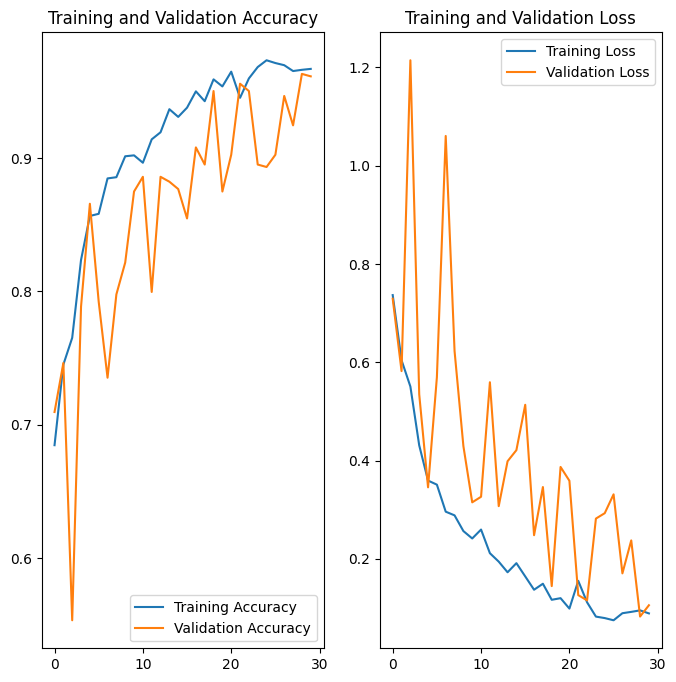

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()

first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
predicted label: Tomato_Late_blight


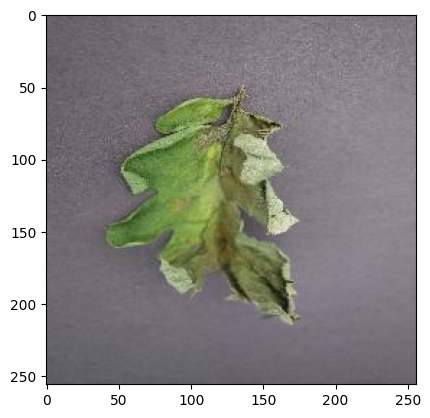

In [47]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


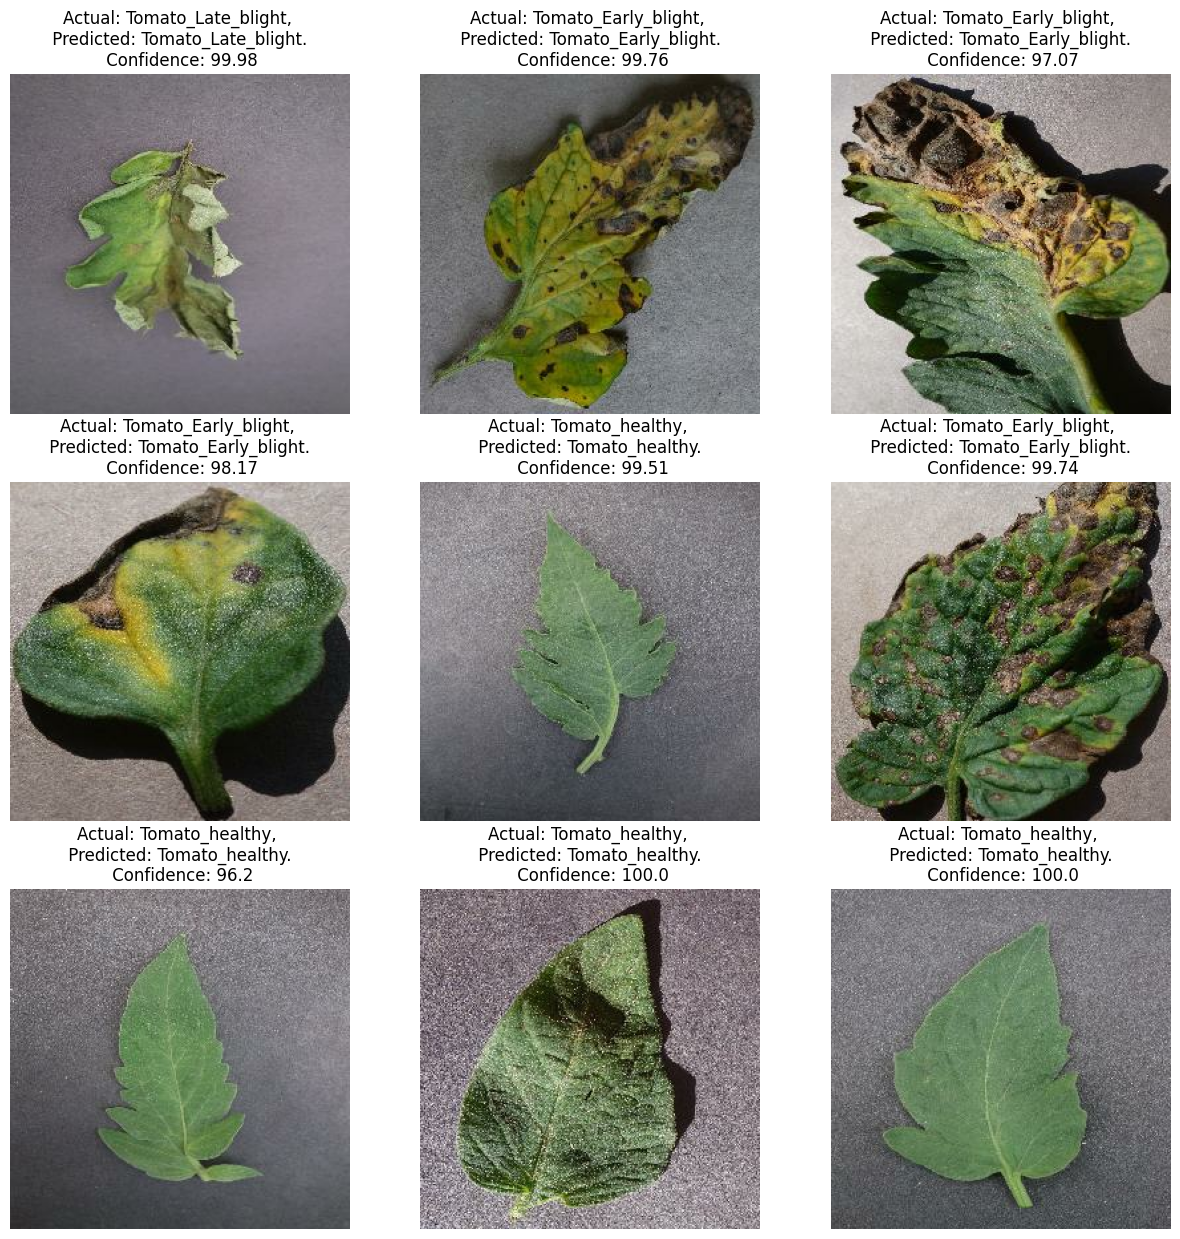

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}")
        plt.axis("off")

In [67]:
import os

# Ensure the directory exists
os.makedirs("../models", exist_ok=True)

# Determine the new model version
model_version = max([int(i) for i in os.listdir("../models") if i.isdigit()] + [0]) + 1

# Define the path for the new version
save_path = f"../models/{model_version}"

# Save the model in the TensorFlow SavedModel format
model.export(save_path)


INFO:tensorflow:Assets written to: ../models/5\assets


INFO:tensorflow:Assets written to: ../models/5\assets


Saved artifact at '../models/5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1859704341520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704341712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704344592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704345360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704344400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704347088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704347664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704348624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704348048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704349392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1859704349008: TensorSpec(shape=(), dty